# Finding and Removing Duplicates (Portfolio Version)

This notebook demonstrates how to **detect**, **analyze**, and **remove** duplicate records from a dataset, including investigating duplicates by a selected set of columns.


## Workflow
1. Load dataset (with known duplicates)
2. Measure duplicate rows
3. Investigate duplicates by key fields (subset)
4. Visualize duplicate patterns
5. Remove duplicates and validate


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the dataset (contains duplicates)
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# Overall duplicate rows (entire row duplicates)
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows (entire row):", duplicate_count)

duplicate_rows = df[df.duplicated()]
duplicate_rows.head()


Number of duplicate rows (entire row): 20


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
# Duplicates based on selected columns (keys)
key_cols = ["MainBranch", "Employment", "RemoteWork"]
subset_dups = df[df.duplicated(subset=key_cols, keep=False)]

print("Duplicate rows based on selected columns:", subset_dups.shape[0])
subset_dups[key_cols].head()


Duplicate rows based on selected columns: 65290


,MainBranch,Employment,RemoteWork
0,I am a developer by profession,"Employed, full-time",Remote
1,I am a developer by profession,"Employed, full-time",Remote
2,I am a developer by profession,"Employed, full-time",Remote
3,I am learning to code,"Student, full-time",NaN
4,I am a developer by profession,"Student, full-time",NaN


In [5]:
# Identify columns that frequently have identical values across duplicate groups
grouped = subset_dups.groupby(key_cols)

# For each group, check if each column has only 1 unique value
identical_across_groups = (grouped.nunique() == 1).sum().sort_values(ascending=False)
identical_across_groups.head(15)


,0
Check,319
ICorPM,97
AIThreat,88
SOAccount,85
AINextLess integrated,76
SurveyLength,75
AISelect,75
AINextMuch more integrated,74
SOPartFreq,67
AINextNo change,67


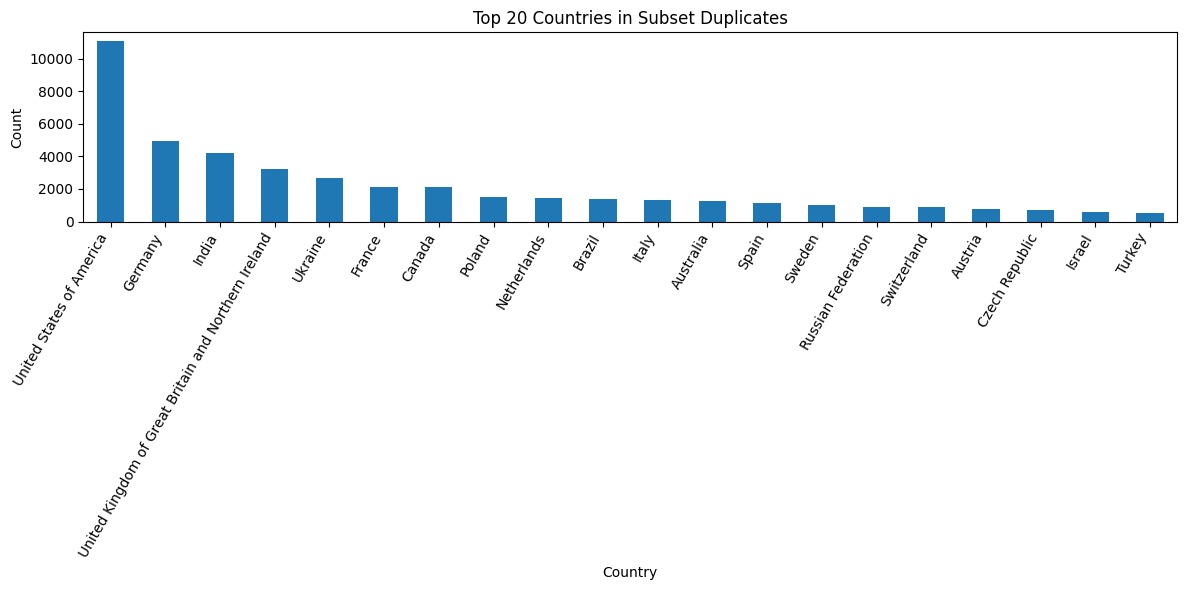

In [6]:
# Visualize where duplicates occur (example: Country)
plt.figure(figsize=(12, 6))
subset_dups["Country"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Countries in Subset Duplicates")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()


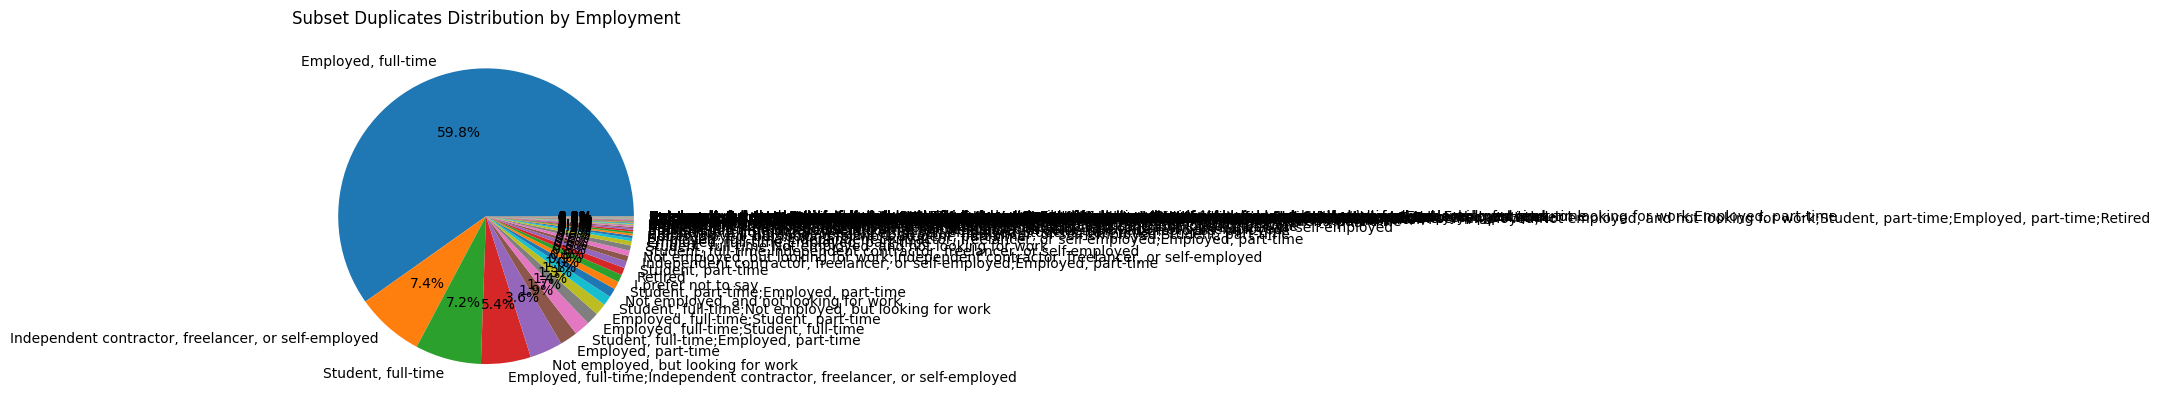

In [7]:
# Distribution by Employment (subset duplicates)
subset_dups["Employment"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Subset Duplicates Distribution by Employment")
plt.ylabel("")
plt.show()


In [8]:
# Remove duplicates based on key columns
df_cleaned = df.drop_duplicates(subset=key_cols, keep="first").copy()
print("Shape before:", df.shape)
print("Shape after removing subset duplicates:", df_cleaned.shape)

# Validate no duplicates remain for the selected keys
remaining = df_cleaned.duplicated(subset=key_cols).sum()
print("Remaining duplicates for key columns:", remaining)

df_cleaned.head()


Shape before: (65457, 114)
Shape after removing subset duplicates: (561, 114)
Remaining duplicates for key columns: 0


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
